# Jupyter Demo

This is a note in Markdown

In [ ]:
2+2

In [ ]:
print("hello")
2+2
3+3

In [ ]:
just some code

# hello world!

In [ ]:
# this is a comment line
print('hello world') # single quotes

In [ ]:
print("hello world") # double quotes

In [ ]:
print('''hello world''') # triple single quotes

In [ ]:
print("""hello world""") # triple double quotes

# Variables

In [ ]:
x = 3

In [ ]:
type(x) # type function

# Operators and Methods

In [ ]:
x + 3

In [ ]:
x.__add__(3) # "dunder add dunder" (or just "add") method
            # Pythons's instructions for executing +

# Lists

In [ ]:
my_list = [ 1,2,3,4,5,6,7,8,9,10]
my_list

In [ ]:
my_list[3::2] # start : end : skip

In [ ]:
my_list.append(7)
my_list

In [ ]:
my_list.remove(2)
my_list

# Dictionaries

In [ ]:
ages = {"Adam": 32, "Ashley": 24, "Jon": 54}
ages

In [ ]:
ages["Adam"]

# if

In [ ]:
A = 10
B = 100

In [ ]:
if A == 10:
    print("var is 10")

In [ ]:
if B == 10:
    print("var is 10")

In [ ]:
if A == 10:
    print("var is 10")
else:
    print("var is not 10")

In [ ]:
if B == 10:
    print("var is 10")
else:
    print("var is not 10")

# for Loops

In [ ]:
total = 0
for number in [1,2,3,4,5]:
    total += number
print("total is:",total)

In [ ]:
import time
counter = 0
my_list = [1,2,3,4,5]
for number in my_list:
    counter += 1
    my_list.append(counter) # extending the list means we will never finish
    print("new_list:", my_list)
    time.sleep(1)

In [ ]:
counter = 0
my_list = [1,2,3,4,5]
for number in my_list:
    counter += 1
#     my_list.append(counter)
    print("new_list:", my_list)
    time.sleep(1)

# Functions

In [ ]:
square

In [ ]:
def square(x):
    """Return the square of x"""
    return x ** 2  # no output when defining the function because there was no execution

In [ ]:
square(3)

In [ ]:
x = square(5)  # here output is saved in x rather than being presented on the screen

In [ ]:
x

# Example

I recommend starting a new notebook for this example problem ("download as .py" and run all cells are not useful since we have intentional errors up above...)

The data used here show measured car speeds with 3 other labels

1. **pair** - There are 14 pairs of data collected
2. **warning** - For each pair, two sections of road were measured:
    1. where a warning sign was placed for part of the experiment
    2. a similar stretch of road in another part of town where no sign was erected during the experiment (control)
3. **period** - (each period has about 100 points) There are 3 time periods in the data for each pair:
    1. Before the warning sign was placed on road section 1
    2. Just after the sign was placed on road section 1
    3. Some time after the sign was erected (so the sign is no longer "new")

We want to study how the **average speed changes** in one section of road (pair 7, say) after the sign was erected, so we need to:

- Read the data
- Loop over the rows of data
- Select data only from the group of interest
- Compute the answer

In [2]:
# pandas is like Excel for Python
# it adds a DataFrame data structure to hold data
# and functions for reading datafiles easily

# Read in a dataset from the web
# Google R datasets, should see listing as second hit linking to:
# https://vincentarelbundock.github.io/Rdatasets/datasets.html
# Using the amis dataset, #5 on that page

# see the documentation for the dataset at
# https://vincentarelbundock.github.io/Rdatasets/doc/boot/amis.html

# this will also work with data stored on your computer
# see pd.read_sql() and pd.read_excel()
# for more data input options

import pandas as pd
df = pd.read_csv(
    "https://vincentarelbundock.github.io/Rdatasets/csv/boot/amis.csv",
    usecols=range(1,5)
                )

In [3]:
df.head() # preview the data

,speed,period,warning,pair
0,26,1,1,1
1,26,1,1,1
2,26,1,1,1
3,26,1,1,1
4,27,1,1,1


In [ ]:
for row in df.head().values:  # loop over the rows... test loop on just a few rows to check
    print(row)

In [ ]:
for row in df.head().values:  # each row is a list, and I want to filter pair = 7
    print(row[3]) # pair is the last column, so I need to slice the last element from each list

In [ ]:
my_list = [] # empty list to save just the data I want
for row in df.values:
    if row[3] == 7: # use an if statement to select just pair 7, note the if is nested inside the loop
        my_list.append(row[0]) # append the speed (index 0) to another list to store the data, note this is indented even more!!

len(my_list)  # see how much data I got

In [ ]:
before = [] # empty list to save just the data I want
for row in df.values:
    if row[3] == 7:  # filter to road segment 7
        if row[2] == 1: # filter just the roads with a warning sign erected
            before.append(row[0]) # note this is indented even more!!

len(before)  # see how much data I got

In [ ]:
before = [] # empty list to save just the data I want
after = [] # empty list to save just the data I want

for row in df.values:
    if row[3] == 7:  # filter to road segment 7
        if row[2] == 1: # filter just the roads with a warning sign erected
            if row[1] == 1: # filter to just the time before the sign
                before.append(row[0]) # note this is indented even more!!
            if row[1] == 3: # filter to just the time after the sign
                after.append(row[0]) # note this is indented even more!!

len(before), len(after)   # see how much data I got

In [ ]:
print("average before sign: ", sum(before)/len(before))  # average = sum / N

In [ ]:
print("average after sign: ", sum(after)/len(after))  # average = sum / N

In [ ]:
# Looks like the sign made no difference 

In [ ]:
# rather than repeat this process in one line with pandas!
df.groupby(['pair','warning','period']).agg(['mean','std']).round(2)

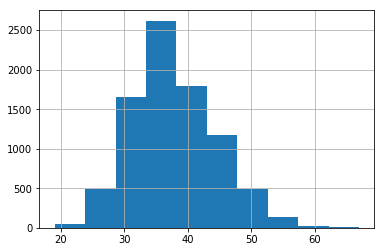

In [5]:
_ = df['speed'].hist() # pandas has lots of other cool features too!

# Download and run as script

0. Change the Notebook name to `speeding_example`
1. File > Download As > Python (.py)
    - Click "Keep" if Browser warns file may be dangerous
2. Open new Terminal (or Anaconda Prompt) window
3. Change to Downloads folder in Terminal
    - type: `cd Downloads` and press enter
4. Run the python script
    - type: `python speeding_example.py` and press enter
    
Note only the printed output lines appear in the terminal!